In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sklearn.set_config(display='diagram')


In [3]:
imported = pd.read_csv('housing.csv')

In [4]:
data = imported.copy()
print(data.shape)
data.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


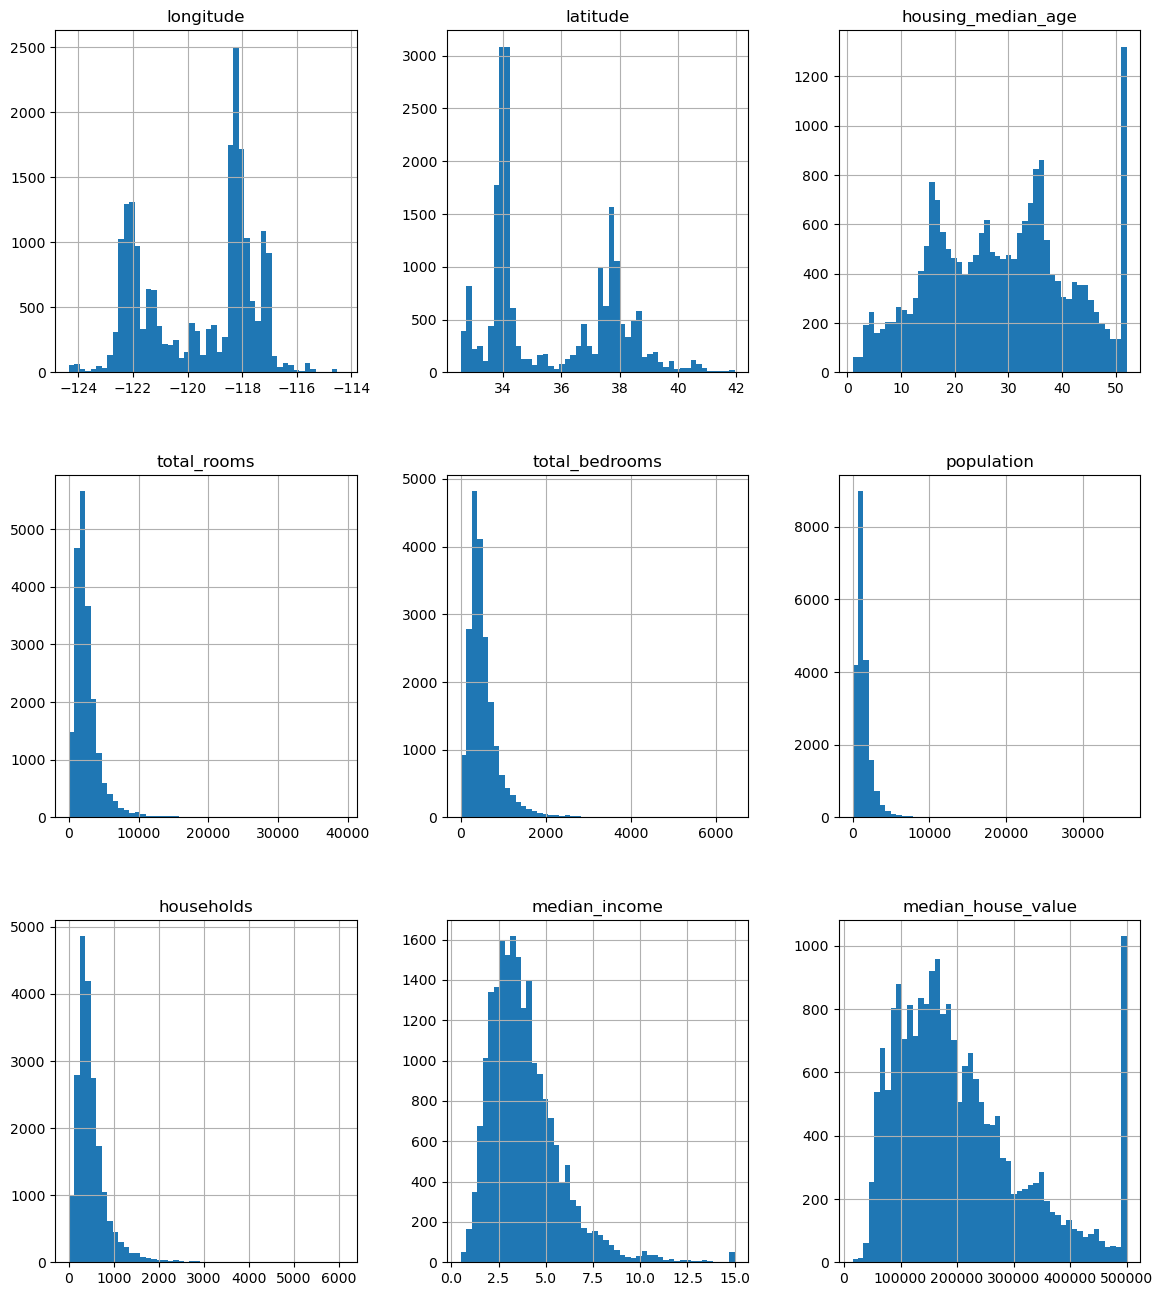

In [7]:
data.hist(figsize=(14,16), bins=50);

In [8]:
data['income_cat'] = pd.cut(data['median_income'], bins=[0, 2, 4, 6, np.inf], labels=[1,2,3,4])

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(5, test_size=0.2,random_state=42)

In [10]:
strat_splits = []
for train, test in splitter.split(data, data['income_cat']):
    strat_train_data = data.iloc[train]
    strat_test_data = data.iloc[test]
    strat_splits.append([strat_train_data, strat_test_data])

In [11]:
train_data, test_data = strat_splits[0]
test_data.income_cat.value_counts() / len(test_data)

income_cat
2    0.489099
3    0.277374
1    0.119186
4    0.114341
Name: count, dtype: float64

In [12]:
for data in (train_data, test_data):
    data.drop('income_cat', axis=1, inplace=True)

In [13]:
housing = train_data.copy()

In [14]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3012,-117.69,33.55,3.0,1618.0,266.0,710.0,246.0,6.0743,274300.0,<1H OCEAN
16951,-118.29,33.88,32.0,2307.0,493.0,1754.0,528.0,4.3170,232800.0,<1H OCEAN
14747,-117.64,34.05,32.0,1129.0,251.0,1378.0,268.0,3.0057,96900.0,INLAND
3846,-117.22,32.81,24.0,730.0,196.0,335.0,203.0,3.5078,362500.0,NEAR OCEAN
12574,-121.71,36.88,19.0,2528.0,554.0,2332.0,492.0,3.7766,177000.0,<1H OCEAN


<Axes: xlabel='longitude', ylabel='latitude'>

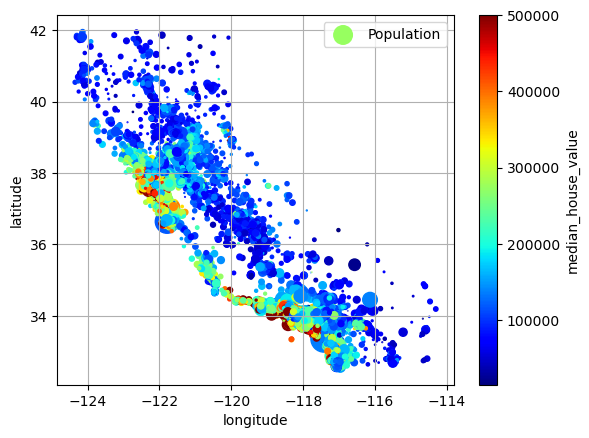

In [15]:
housing.plot.scatter(x='longitude', y='latitude', grid=True, s=housing['population']/100,
    label="Population", c='median_house_value', cmap='jet', legend=True)

In [16]:
housing.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687625
total_rooms           0.138470
housing_median_age    0.100729
households            0.068063
total_bedrooms        0.052905
population           -0.025029
longitude            -0.039394
latitude             -0.149820
Name: median_house_value, dtype: float64

<Axes: xlabel='median_income', ylabel='median_house_value'>

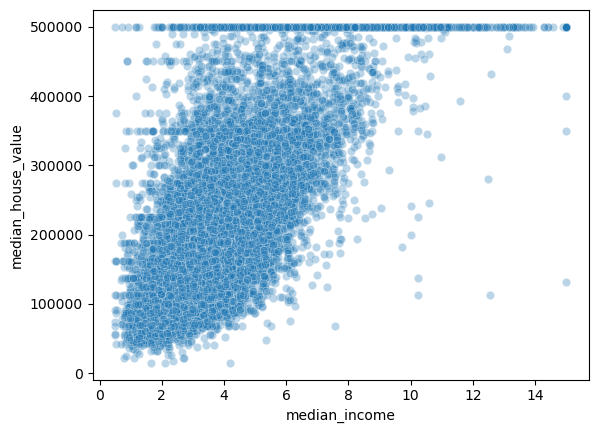

In [17]:
sns.scatterplot(data=housing, x='median_income', y='median_house_value', alpha=0.3)

#### We can see a line at 500,000 house value. This means our data was only for house values under 500,000

In [18]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 3012 to 16073
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16348 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


#### As we can see, we have some missing values in 'total_bedrooms'. We either nees to remove the column, or remove the instances with msiing values, or fill in the missing values. filling in is the least destructive operationm

In [19]:
from sklearn.impute import SimpleImputer
housing_num = housing.select_dtypes(include=np.number)
imputer = SimpleImputer(strategy='median')
imputer.fit(housing_num)
imputer.statistics_, housing_num.median().values

(array([-1.18490e+02,  3.42500e+01,  2.90000e+01,  2.11800e+03,
         4.33000e+02,  1.16500e+03,  4.08000e+02,  3.52955e+00,
         1.79500e+05]),
 array([-1.18490e+02,  3.42500e+01,  2.90000e+01,  2.11800e+03,
         4.33000e+02,  1.16500e+03,  4.08000e+02,  3.52955e+00,
         1.79500e+05]))

In [20]:
imputer.transform(housing_num)
# housing_num.info()

array([[-1.1769e+02,  3.3550e+01,  3.0000e+00, ...,  2.4600e+02,
         6.0743e+00,  2.7430e+05],
       [-1.1829e+02,  3.3880e+01,  3.2000e+01, ...,  5.2800e+02,
         4.3170e+00,  2.3280e+05],
       [-1.1764e+02,  3.4050e+01,  3.2000e+01, ...,  2.6800e+02,
         3.0057e+00,  9.6900e+04],
       ...,
       [-1.2232e+02,  3.7940e+01,  4.6000e+01, ...,  3.5200e+02,
         5.5196e+00,  2.1080e+05],
       [-1.2145e+02,  4.1040e+01,  3.3000e+01, ...,  3.4300e+02,
         2.6700e+00,  7.7500e+04],
       [-1.1711e+02,  3.2730e+01,  3.4000e+01, ...,  2.2300e+02,
         3.8355e+00,  1.2670e+05]])

In [21]:
pd.get_dummies(data=housing, columns=['ocean_proximity'])


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
3012,-117.69,33.55,3.0,1618.0,266.0,710.0,246.0,6.0743,274300.0,True,False,False,False,False
16951,-118.29,33.88,32.0,2307.0,493.0,1754.0,528.0,4.3170,232800.0,True,False,False,False,False
14747,-117.64,34.05,32.0,1129.0,251.0,1378.0,268.0,3.0057,96900.0,False,True,False,False,False
3846,-117.22,32.81,24.0,730.0,196.0,335.0,203.0,3.5078,362500.0,False,False,False,False,True
12574,-121.71,36.88,19.0,2528.0,554.0,2332.0,492.0,3.7766,177000.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12798,-121.97,37.29,25.0,4096.0,743.0,2027.0,741.0,5.3294,300300.0,True,False,False,False,False
7300,-118.14,33.97,36.0,1407.0,385.0,1763.0,350.0,2.6364,150000.0,True,False,False,False,False
11551,-122.32,37.94,46.0,1901.0,295.0,833.0,352.0,5.5196,210800.0,False,False,False,True,False
2726,-121.45,41.04,33.0,2029.0,378.0,936.0,343.0,2.6700,77500.0,False,True,False,False,False


### We can one hot encode our ocean proximity variable because machine learning algorith only takes numerical as input. so we can do this by above method or by sklearn.

In [22]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
hot1encoder = OneHotEncoder()

In [23]:
hot1encoded = hot1encoder.fit_transform(housing[['ocean_proximity']])

In [24]:
hot1encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [25]:
hot1encoded.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [26]:
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
 ("impute", SimpleImputer(strategy="median")),
 ("standardize", StandardScaler()),
])
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [27]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
3012,-117.69,33.55,3.0,1618.0,266.0,710.0,246.0,6.0743,274300.0
16951,-118.29,33.88,32.0,2307.0,493.0,1754.0,528.0,4.3170,232800.0
14747,-117.64,34.05,32.0,1129.0,251.0,1378.0,268.0,3.0057,96900.0
3846,-117.22,32.81,24.0,730.0,196.0,335.0,203.0,3.5078,362500.0
12574,-121.71,36.88,19.0,2528.0,554.0,2332.0,492.0,3.7766,177000.0
...,...,...,...,...,...,...,...,...,...
12798,-121.97,37.29,25.0,4096.0,743.0,2027.0,741.0,5.3294,300300.0
7300,-118.14,33.97,36.0,1407.0,385.0,1763.0,350.0,2.6364,150000.0
11551,-122.32,37.94,46.0,1901.0,295.0,833.0,352.0,5.5196,210800.0
2726,-121.45,41.04,33.0,2029.0,378.0,936.0,343.0,2.6700,77500.0


In [35]:
from sklearn.compose import ColumnTransformer, make_column_selector

In [28]:
processed_num = num_pipeline.fit_transform(housing_num)
processed_num[:2].round(2)
processed_df = pd.DataFrame(processed_num,index=housing_num.index, columns=num_pipeline.get_feature_names_out() )

In [29]:
type(num_pipeline.named_steps)
num_pipeline.named_steps

{'impute': SimpleImputer(strategy='median'), 'standardize': StandardScaler()}

In [31]:
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [33]:
cat_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])k

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder())])

In [36]:
preprocessing = ColumnTransformer([
    ("num", num_pipeline, make_column_selector)
    ])